In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("VDO_6_advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


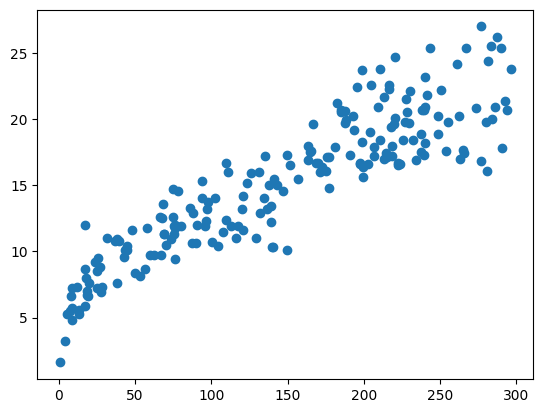

In [18]:
# sns.pairplot(df)  to check the correlation between columns

# METHOD 2 - Check individually
# plt.scatter(x=df['Radio'], y=df['Sales'])
# plt.scatter(x=df['Newspaper'], y=df['Sales'])
plt.scatter(x=df['TV'], y=df['Sales'])


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((160, 3), (40, 3), (160,), (40,))

# Applying Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [22]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# Metrics R2_score

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred)  # it used to check the error in model

1.2748262109549338

In [24]:
r2_score(y_test,y_test) # it used to check the error in model

1.0

# Pridiction

In [25]:
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features = np.array([[tv_budget,radio_budget,newspaper_budget]])
    results = lr.predict(features).reshape(1,-1)
    return results[0]

In [26]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [27]:
tv_budget =230.1
radio_budget=37.8
newspaper_budget=69.2
sales = predict_sales(tv_budget,radio_budget,newspaper_budget)

f:\Scikit Learn\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
sales

array([21.37254028])

# Save Model
model is working properly so now using pickle lib we will save it 

In [29]:
import pickle
pickle.dump(lr,open('VDO_6_linear_regression_model.pkl','wb')) 
#model name-linear_regression_model.pkl
#wb - write binary